<a href="https://colab.research.google.com/github/ArantesJoao/courses/blob/master/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando as notas em geral

In [ ]:
import pandas as pd

notas = pd.read_csv("/content/drive/My Drive/Alura/data_science/inicial/ratings.csv")

In [ ]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
print('Media:', notas['nota'].mean())
print('Mediana:', notas['nota'].median())

Media: 3.501556983616962
Mediana: 3.5


In [ ]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

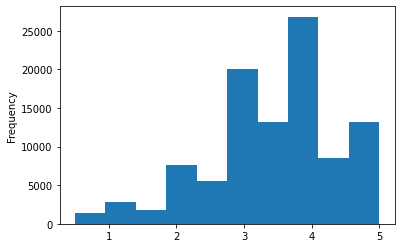

In [ ]:
notas.nota.plot(kind='hist')

In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

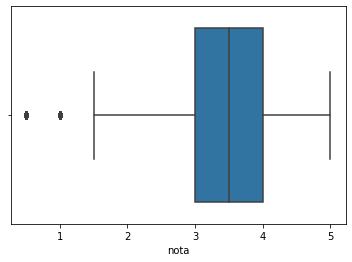

In [ ]:
import seaborn as sns

sns.boxplot(notas.nota)


# Olhando os filmes

In [ ]:
filmes = pd.read_csv('/content/drive/My Drive/Alura/data_science/inicial/movies.csv')
filmes.columns = ['filmesId', 'titulo', 'generos']
filmes.head()

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando algumas notas específicas por filme

In [ ]:
notas.query('filmeId==1').nota.mean()


3.9209302325581397

In [ ]:
notas.query('filmeId==2').nota.mean()


3.4318181818181817

In [ ]:
medias_por_filme = notas.groupby('filmeId').mean()["nota"]
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

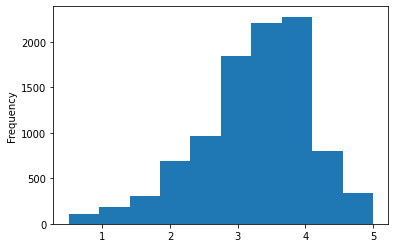

In [ ]:
medias_por_filme.plot(kind='hist')

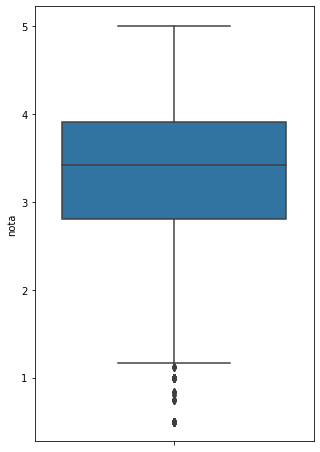

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 8))
sns.boxplot(y=medias_por_filme)

In [ ]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

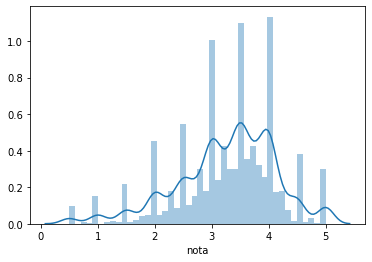

In [ ]:
sns.distplot(medias_por_filme) # o número passado em bins determina quantas "caixinhas" vai aparecer, qeu pode interferir muito na conclusão final
                               # o seaborn já usa fórmulas "mágicas" para já tentar passar o número de bins mais aproriado

Text(0.5, 1.0, 'Histograma das médias dos filmes')

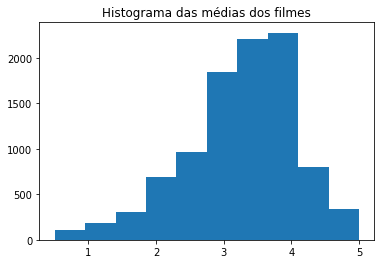

In [ ]:
import matplotlib.pyplot as plt # o matplotlib é a biblioteca baixo nível usada pelo sns/pd lá por trás para gerar os gráficos

plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')

In [ ]:
tmdb = pd.read_csv('/content/drive/My Drive/Alura/data_science/TMBD/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
tmdb['original_language'].value_counts() # isso é uma única série, uma única coluna, já que en/fr/etc é o index, diferente de um DataFrame, que tem várias colunas

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ar       2
cs       2
ro       2
ta       2
id       2
sl       1
nb       1
ps       1
tr       1
ky       1
te       1
vi       1
is       1
xx       1
hu       1
af       1
no       1
el       1
pl       1
Name: original_language, dtype: int64

In [ ]:
tmdb['original_language'].value_counts().to_frame() # desta maneira, temos um DataFrame propriamente dito

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ru,11


In [ ]:
tmdb['original_language'].value_counts().to_frame().reset_index() # assim, o antigo index vira uma coluna chamada index, e o index propriamente dito volta ao padrão
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


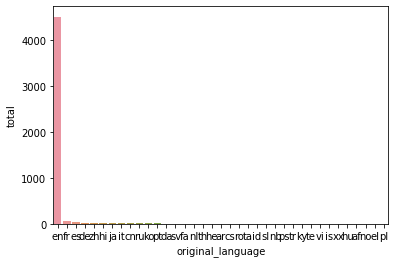

In [ ]:
sns.barplot(x='original_language', y='total', data = contagem_de_lingua)

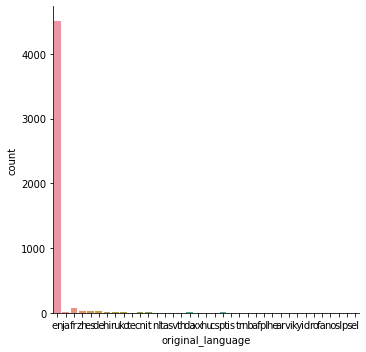

In [ ]:
sns.catplot(x= 'original_language', data = tmdb, kind='count') # uma maneira mais alto nível de passar o que você quer para o Seaborn

([<matplotlib.patches.Wedge at 0x7f907ec07e48>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

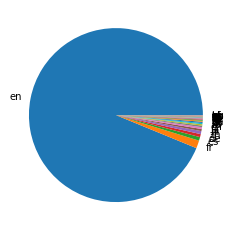

In [ ]:
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language']) # pie quase nunca é o ideal

# Criando e plotando um DataFrame

O objetivo aqui é achar o gráfico correto para mostrar que, comparado com outras línguas, inglês tem muito destaque nesse conjunto de dados, porém, de uma maneira educada.
*   Uma das saídas é comparar o inglês com todas as outras línguas

In [ ]:
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en'] # localizar a(s) linha(s), cujo índice tenha o valor 'en'
total_do_resto = total_geral - total_de_ingles

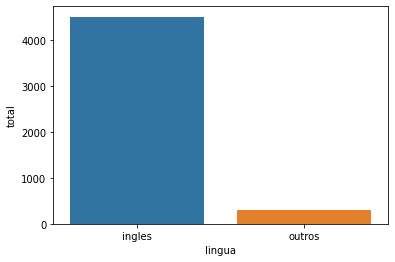

In [ ]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados
sns.barplot(x='lingua', y='total', data = dados) # agora o gráfico ta contando a história que estava sendo buscada

In [ ]:
total_por_linguas_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_linguas_de_outros_filmes.index

Index(['fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt', 'da',
       'sv', 'nl', 'fa', 'he', 'th', 'cs', 'ro', 'id', 'ta', 'ar', 'no', 'pl',
       'af', 'te', 'ky', 'vi', 'is', 'tr', 'nb', 'xx', 'sl', 'ps', 'hu', 'el'],
      dtype='object')

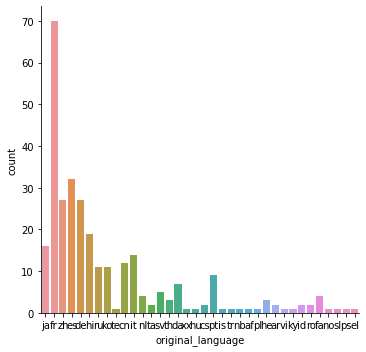

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = 'original_language', kind='count', data = filmes_sem_lingua_original_em_ingles)



---



**Refinando o gráfico de outros países**

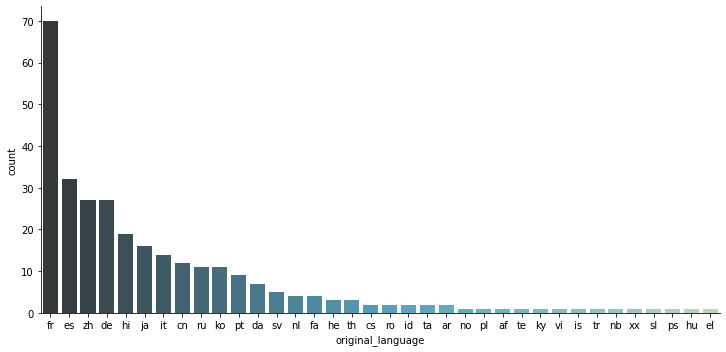

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

sns.catplot(x = 'original_language', kind='count',
              data = filmes_sem_lingua_original_em_ingles, aspect = 2, 
              order = total_por_linguas_de_outros_filmes.index, # na ordem que ta esse index
              palette='GnBu_d') 



---



# Problema de usar apenas mediana ou média

In [ ]:
filmes.head(2)

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas_toy_story = notas.query("filmeId==1")
notas_jumanji = notas.query("filmeId==2")
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [ ]:
print('Nota média do Toy Story: %.2f' % notas_toy_story.nota.mean()) # %.2f => 2 casa decimais de um ponto flutuante
print('Nota média do Jumanji: %.2f' % notas_jumanji.nota.mean())

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


Calculando apenas a média você perde informações importantes como: quantas pessoas odiaram e quantas pessoas amaram o filme

In [ ]:
import numpy as np
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


Quem vai acusar essa diferença é o desvio padrão (standard deviation)

In [ ]:
import numpy as np
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2)) # Muito maior no filme2 que no filme1
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

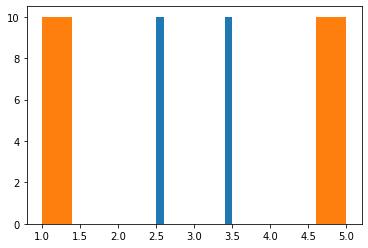

In [ ]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f907c51ea20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f907c4ab470>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f907c4abef0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f907c4abb70>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f907c51ed30>,
  <matplotlib.lines.Line2D at 0x7f907c4b59b0>]}

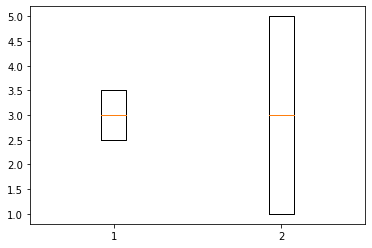

In [ ]:
plt.boxplot([filme1, filme2])

# Jeito correto para pegar todos os dados mais importantes do DataFrame

{'boxes': [<matplotlib.lines.Line2D at 0x7f907c3b0d68>,
 'caps': [<matplotlib.lines.Line2D at 0x7f907c3bd780>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f907c3c6240>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f907c3bde80>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f907c3bd080>,
  <matplotlib.lines.Line2D at 0x7f907c3c6cc0>]}

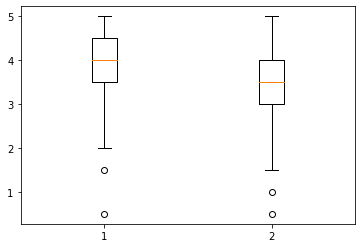

In [ ]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

**Ainda fica muito poluído, então...**

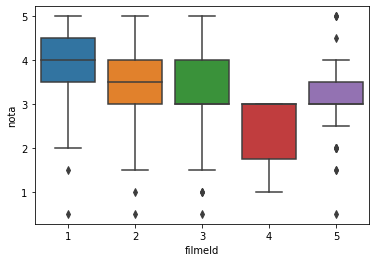

In [ ]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1, 2, 3, 4, 5]"))

**O desvio padrão mostra exatamente isso, mas em números, o quanto os dados estão fugindo de uma tendência central, logo, devemos mostrar por exemplo, a média acompanhada do desvio padrão**

In [ ]:
print(notas_toy_story.nota.std(), notas_jumanji.nota.std())

0.8348591407114045 0.8817134921476455


In [ ]:
print(notas_toy_story.nota.mean(), notas_jumanji.nota.mean())

3.9209302325581397 3.4318181818181817
